## Подготовка данных

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import numpy as np

Загружаем данные

In [38]:
df = pd.read_csv('/datasets/Churn.csv')

Ознакамливаемся с данными

In [39]:
display(df.head(10))
print(df.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Около 10 % всех данных в 'Tenure' утеряны. 

Решил заменить пропуски медианным значением. Посмотрим, что из этого получится.

In [40]:
print(df['Tenure'].median())

5.0


In [41]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Продолжим обработку данных. Удалим не нужные данные, которые не могут быть использованы в прогнозировании.

In [43]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Рассмотрим категориальные признаки

In [44]:
calegories = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for i in calegories:
    print("Название: "+i)
    print(df[i].value_counts(normalize=True))
    print('----------------------------------------------')

Название: Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
----------------------------------------------
Название: Gender
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
----------------------------------------------
Название: Tenure
5.0     0.1836
1.0     0.0952
2.0     0.0950
8.0     0.0933
3.0     0.0928
7.0     0.0925
4.0     0.0885
9.0     0.0882
6.0     0.0881
10.0    0.0446
0.0     0.0382
Name: Tenure, dtype: float64
----------------------------------------------
Название: NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64
----------------------------------------------
Название: HasCrCard
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64
----------------------------------------------
Название: IsActiveMember
1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64
----------------------------------------------
Название: Exited
0    0.7963
1    0.2037
Name: Exit

Как можно видеть, наш целевой признак в "Exited", имеет соотношение 80:20. Уже сейчас можно говорить, что придется бороться с дисбалансом. 

Преобразуем в численные значения с помощью OHE

In [45]:
df = pd.get_dummies(df, drop_first=True)

И последнее, что можно сделать это масштабировать численные признаки.

## Исследование задачи

Разделим целевой признак и наши данные для прогнозирования.

In [47]:
features = df.drop('Exited', axis=1)
target = df['Exited']

Разделим обучающею, валидационную и тестовую выборку. 50:25:25

In [48]:
features_train, q, target_train, i = train_test_split(features, target, test_size=0.5, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(q, i, test_size=0.5, random_state=12345)

In [49]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5000, 11)
(2500, 11)
(2500, 11)


In [50]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_test[numerics]) 
features_test[numerics]= scaler.transform(features_test[numerics])
display(features_test.head(10))

/tmp/ipykernel_31/2181922424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numerics]= scaler.transform(features_test[numerics])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5403,-0.626650,-1.646608,5.0,0.798628,1,1,1,1.060111,0,1,1
4488,0.661608,0.500412,6.0,1.279009,1,0,0,0.580286,0,0,0
3888,0.937664,3.135391,0.0,-1.217340,2,0,1,-1.242793,0,0,1
1653,-1.546834,1.671514,1.0,0.398043,1,1,0,0.310751,0,0,1
7991,-2.293206,0.012453,9.0,-1.217340,2,1,0,-1.268541,0,1,0
3008,1.305737,2.257064,10.0,0.699346,1,0,1,0.284239,0,0,1
7429,0.344656,0.402820,6.0,0.670475,1,0,0,-0.561745,0,1,0
9356,-2.845316,0.305228,7.0,-1.217340,1,1,0,-0.402547,0,0,1
1568,0.252638,0.110045,8.0,0.617418,1,1,1,-0.574069,0,0,1
8266,-0.933378,-0.377915,1.0,-1.217340,2,1,0,-1.700797,0,0,0


In [51]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numerics]) 
features_train[numerics]= scaler.transform(features_train[numerics])
display(features_train.head(10))

/tmp/ipykernel_31/3010540455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numerics]= scaler.transform(features_train[numerics])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6331,-0.239180,-0.374637,8.0,0.572035,1,1,1,-0.140281,1,0,1
8201,0.685393,0.953729,10.0,0.089503,1,0,1,-1.526589,0,1,0
3109,2.056669,0.763962,10.0,0.926601,1,0,0,-1.254584,1,0,0
4773,-0.062576,-0.374637,1.0,0.726751,2,1,1,0.759638,1,0,0
8881,0.955493,-0.943937,1.0,-0.534666,1,1,1,0.351470,0,0,1
5015,0.311409,1.048612,6.0,0.724598,2,0,1,0.435208,0,0,1
9519,-0.436560,-1.133703,2.0,-1.234200,2,1,0,-1.467524,0,0,0
3380,-0.498891,-1.228586,3.0,-1.234200,2,1,0,0.975055,0,1,0
7585,-1.683175,0.099779,1.0,-1.234200,1,1,1,-0.859102,0,0,0
6745,-1.039091,1.523028,3.0,-1.234200,1,1,1,-1.019859,0,1,1


In [52]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_valid[numerics]) 
features_valid[numerics]= scaler.transform(features_valid[numerics])
display(features_valid.head(10))

/tmp/ipykernel_31/688576295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[numerics]= scaler.transform(features_valid[numerics])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7566,-0.756859,-0.274770,4.0,0.018664,1,1,0,1.137030,0,1,1
5696,-0.309676,0.196049,7.0,-1.217993,2,0,1,-1.506340,0,0,1
9452,-0.496869,-1.122244,5.0,-1.217993,2,1,0,-1.228269,0,0,1
1325,-0.351274,0.666868,8.0,1.443444,1,0,1,-0.988414,0,0,0
448,0.293502,-0.086442,6.0,-0.138389,1,0,0,0.646890,0,0,0
1010,0.803084,0.101885,10.0,-1.217993,1,1,0,0.457526,0,0,1
3640,-0.091284,0.007721,0.0,0.725022,2,1,1,-0.111437,1,0,0
6728,1.635053,-0.557261,10.0,0.976179,1,1,1,-0.363074,1,0,0
4376,-0.340875,-0.463097,5.0,-1.217993,2,1,0,1.457466,0,0,0
6962,0.314301,-1.216407,3.0,0.406126,1,1,0,0.310635,1,0,0


### Случайный лес

In [53]:
def random_forest(features_valid, features_train, target_valid,target_train, class_weight = None):
    f1_par = []
    best_f1 = 0
    roc_auc_par = []
    best_roc_auc = 0.5
    
    for n_estimators in tqdm(range(10, 20)):
        for max_depth in range(10,30,2):
            for min_samples_split in range(2,10):
                for min_samples_leaf in range(2,10):
                    model_forest = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          class_weight = class_weight)
                    model_forest.fit(features_train, target_train)
                    predictions = model_forest.predict(features_valid)
                    f1 = f1_score(target_valid, predictions)
                    if f1 > best_f1:
                        f1_par = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_f1 = f1
                    roc_auc = roc_auc_score(target_valid, predictions)
                    if roc_auc > best_roc_auc:
                        roc_auc_par = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_roc_auc = roc_auc
    print('Лучший результат f1: '+ str(best_f1))
    print('n_estimators: '+ str(f1_par[0]))
    print('max_depth: '+ str(f1_par[1]))
    print('min_samples_split: '+ str(f1_par[2]))
    print('min_samples_leaf: '+ str(f1_par[3]))
    print('-----------------------------------------')
    print('Лучший результат roc_auc: ' + str(best_roc_auc))
    print('n_estimators: '+ str(roc_auc_par[0]))
    print('max_depth: '+ str(roc_auc_par[1]))
    print('min_samples_split: '+ str(roc_auc_par[2]))
    print('min_samples_leaf: '+ str(roc_auc_par[3]))

In [54]:
random_forest(features_valid, features_train, target_valid,target_train)

100%|██████████| 10/10 [09:22<00:00, 56.25s/it]

Лучший результат f1: 0.5773955773955775
n_estimators: 14
max_depth: 16
min_samples_split: 2
min_samples_leaf: 2
-----------------------------------------
Лучший результат roc_auc: 0.713477927457863
n_estimators: 14
max_depth: 16
min_samples_split: 2
min_samples_leaf: 2


### Вывод по случайному лесу

Случайное дерево не удовлетворяет требованиям задачи, которое говорит, что метрику f1 нужно довести до 0.59 минимум. Дисбаланс класса дает о себе знать возможно.

### Логистическая регрессия

In [55]:
def logistic(features_valid, features_train, target_valid,target_train):
    f1_par = []
    best_f1 = 0
    roc_auc_par = []
    best_roc_auc = 0.5
    
    model_regression = LogisticRegression(random_state=12345, max_iter=1000)
    model_regression.fit(features_train, target_train)
    predictions = model_regression.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    roc_auc = roc_auc_score(target_valid, predictions)

    print('Лучший результат f1: '+ str(f1))
    print('-----------------------------------------')
    print('Лучший результат roc_auc: ' + str(roc_auc))

In [56]:
logistic(features_valid, features_train, target_valid,target_train)

Лучший результат f1: 0.3070539419087137
-----------------------------------------
Лучший результат roc_auc: 0.5831475508332543


### Вывод по логистической регрессии

Логистическая регрессия не удовлетворяет требованиям задачи, которое говорит, что метрику f1 нужно довести до 0.59 минимум. Дисбаланс класса дает о себе знать возможно. 

### Общий вывод 

Для решения данной задачи используем слуяайный лес, так как его метрика при базовых параметрах больше, чем у логистической регрессии.

## Борьба с дисбалансом

### Взвешивание классов

Применим взвешивание классов. Самый простой способ борьбы с дисбалансом.

In [57]:
random_forest(features_valid, features_train, target_valid,target_train, class_weight = 'balanced')

100%|██████████| 10/10 [09:02<00:00, 54.25s/it]

Лучший результат f1: 0.6006256517205423
n_estimators: 17
max_depth: 16
min_samples_split: 9
min_samples_leaf: 2
-----------------------------------------
Лучший результат roc_auc: 0.7561209404547323
n_estimators: 11
max_depth: 12
min_samples_split: 2
min_samples_leaf: 9


**Вывод**

Метрика уже удовлетворяет требованиям задания, но продолжим исследование.

### Увеличение выборки

Напишем функцию для увеличения выборки

In [58]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Применим функцию и увеличим выборку

In [59]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Увеличение в 3 раза был применят 'на глаз'. В идеале надо было бы снова перебрать выборки с разным параметром увеличения, но поиск параметров на одной выборке занимает более 10 минут. Поэтому было принято решение сэкономить время, ведь результаты уже удовлетворяют заданию.

In [60]:
random_forest(features_valid, features_upsampled, target_valid,target_upsampled, class_weight = 'balanced')

100%|██████████| 10/10 [11:26<00:00, 68.70s/it]

Лучший результат f1: 0.6049046321525886
n_estimators: 19
max_depth: 16
min_samples_split: 2
min_samples_leaf: 6
-----------------------------------------
Лучший результат roc_auc: 0.766234228251589
n_estimators: 10
max_depth: 18
min_samples_split: 2
min_samples_leaf: 9


In [61]:
random_forest(features_valid, features_upsampled, target_valid,target_upsampled)

100%|██████████| 10/10 [11:15<00:00, 67.57s/it]

Лучший результат f1: 0.6098039215686274
n_estimators: 10
max_depth: 16
min_samples_split: 9
min_samples_leaf: 3
-----------------------------------------
Лучший результат roc_auc: 0.7574807102425449
n_estimators: 15
max_depth: 14
min_samples_split: 2
min_samples_leaf: 9


### Порог классификации

Посмотрим повлияет ли порог классификации на результат.

In [62]:
model = RandomForestClassifier(random_state=12345,
                                                          n_estimators=10,
                                                          max_depth=16,
                                                          min_samples_split=9,
                                                          min_samples_leaf=3)
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=10, random_state=12345)

In [63]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [64]:
ther_f1 = []
for threshold in tqdm(np.arange(0, 0.9, 0.02)):
    predicted_valid = probabilities_one_valid > threshold # < напишите код здесь >
    f1 = f1_score(target_valid, predicted_valid)
    ther_f1.append(f1)
print(max(ther_f1))

100%|██████████| 45/45 [00:00<00:00, 524.33it/s]

0.6098039215686274


### Общий вывод

Метрика f1 была повышена с 0.57 до 0.61. 

Параметры: 

- Случайный лес
- n_estimators=10,
- max_depth=16,
- min_samples_split=9,
- min_samples_leaf=3
- увеличение выборки *3

## Тестирование модели

Применим нашу модель на тестовой выборке.

In [65]:
model_final = RandomForestClassifier(random_state=12345,
                                         n_estimators=10,
                                         max_depth=16,
                                         min_samples_split=9,
                                         min_samples_leaf=3)
model_final.fit(features_upsampled, target_upsampled)
predictions = model_final.predict(features_test)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, predictions)
print('f1: ' + str(f1))
print('Roc-Auc: ' + str(roc_auc))

f1: 0.6159844054580896
Roc-Auc: 0.758419983302774


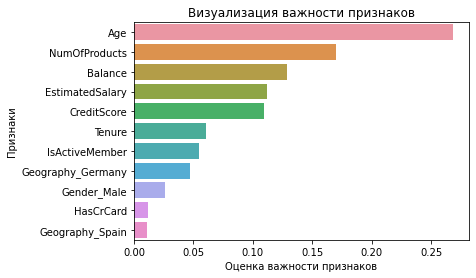

In [66]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_valid.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

#chart_feature_imp(decision_tree_model)
#![image.png](attachment:image.png)
chart_feature_imp(model_final)

### Общий вывод

Наша модель удовлетворяет требованиям и показывает адекватные значения для этого задания.

## Общий вывод

- Данные были загружены. 
- Было произведено ознакомление с данными 
- Были заполнены пропуски в данных 
- Целей признак распределен в соотношении 80:20
- Были построены модели:
 - Случайный лес
   - f1 = 0.57
   - ROC-AUC = 0.71
 - Логистическая регрессия
   - f1 = 0.31
   - ROC-AUC = 0.58
- Для дальнейшего исследования был выбран 'Случайный лес'
- Для борьбы с дисбалансом были применены следующие методы:
 - Взвешивание классов
 - Увеличение выборки
 - Изменение порога классификации
- Были получены лучшие значения при следующих параметрах:
 - Случайный лес
 - n_estimators=10,
 - max_depth=16,
 - min_samples_split=9,
 - min_samples_leaf=3
 - увеличение выборки *3
- Модель была применена к тестовой выборке и получены следующие результаты:
 - f1 = 0.6159
 - ROC-AUC = 0.7584 